## Exercise1

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#reading the csv file
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### METADATA

- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex
- Age	Age in years
- sibsp	# of siblings / spouses aboard the Titanic
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number
- fare	Passenger fare
- cabin	Cabin number
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

#### Q1
preprocessing - dealing with missing values and removing unnecessary attributes

In [3]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


removing unnecessary attributes

In [4]:
df.drop(['PassengerId','Name','Ticket','Cabin','Fare'],axis = 1, inplace = True)

In [5]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [6]:
# finding the number of null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

therefore age has 177 missing values. We can replace the missing values with the measure of central tendency. we use a distribution plot to decide on the imputation techniques

D:\Ananconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

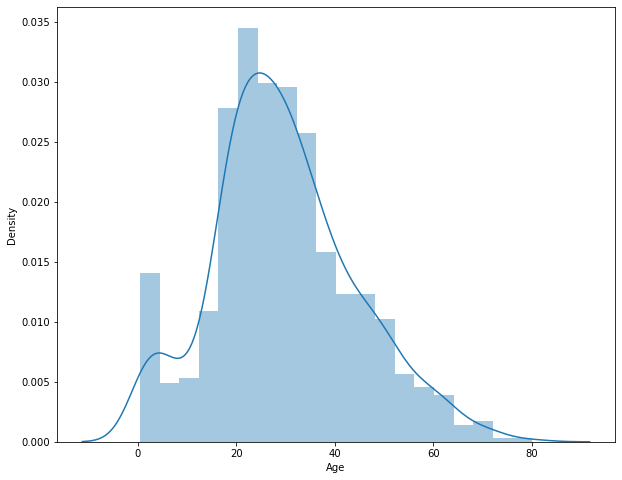

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
sb.distplot(df.Age)

In [8]:
#replacing missing age values with median
df['Age']=df['Age'].fillna(df['Age'].median())

In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [10]:
df = df.dropna(how='any',axis=0) 

In [11]:
df.isnull().sum() #this code is removing rows with the two missing embarked vaues

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

#### Q2

In [32]:
#splitting the data into training and testing
train_df = df.sample(frac=0.8,random_state =25)
test_df = df.drop(train_df.index)

In [13]:
#import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [14]:
nominal = ["Sex","Embarked"]
ordinal = ["Pclass"]
numerical = ["Age","SibSp","Parch"]

In [15]:
ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", MinMaxScaler())])

nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))])

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())])

In [16]:
from sklearn.compose import ColumnTransformer
preprocessing_pipeline = ColumnTransformer([
    ("nominal_preprocessor", nominal_pipeline, nominal),
    ("ordinal_preprocessor", ordinal_pipeline, ordinal),
    ("numerical_preprocessor", numerical_pipeline, numerical)
])

In [17]:
from sklearn.linear_model import LogisticRegression
model = Pipeline([('preprocessor', preprocessing_pipeline),
                 ('clf', LogisticRegression(solver='liblinear')),])
model.fit(train_df, train_df['Survived'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nominal_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked']),
                                                 ('ordinal_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   MinMaxScaler())]),
                     

In [18]:
accuracy = round(model.score(train_df,train_df['Survived'])*100,2)
print(accuracy)

79.61


In [19]:
y_pred = model.predict(test_df)

prediction_made = pd.DataFrame({
    "Sex": test_df['Sex'],
    "Survived": y_pred
})
print(prediction_made)

        Sex  Survived
8    female         1
14   female         1
15   female         1
20     male         0
22   female         1
..      ...       ...
877    male         0
878    male         0
884    male         0
888  female         1
889    male         1

[178 rows x 2 columns]


#### Q3

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
#converting male and female to 0 and 1
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [22]:
# converting embarked feature to numberic
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [23]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
759,1,1,1,33.0,0,0,0
874,1,2,1,28.0,1,0,1
267,1,3,0,25.0,1,0,0
506,1,2,1,33.0,0,2,0
543,1,2,0,32.0,1,0,0


In [24]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("Survived", axis=1)
Y_test = test_df["Survived"]

In [25]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [26]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
confusion_matrix

array([[84, 31],
       [11, 52]], dtype=int64)

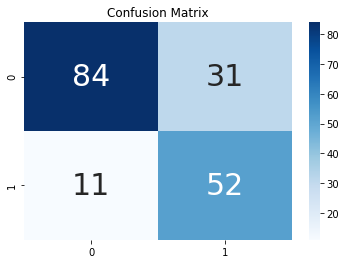

In [27]:
#displaying in the form of heatmap
ax = plt.axes()
df_cm = confusion_matrix
sb.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

#### Q4

In [28]:
TN = confusion_matrix[0,0]
TP = confusion_matrix[1,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,1]
TNR = TN / (TN+FP)

In [29]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))
print("Specificity:",TNR)

Accuracy: 0.7640449438202247
Precision: 0.6265060240963856
Recall: 0.8253968253968254
Specificity: 0.7304347826086957


#### Q5

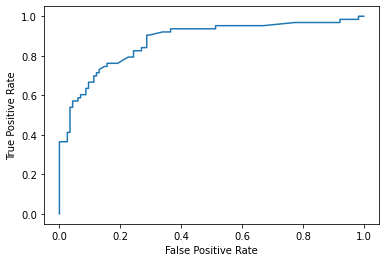

In [30]:
from sklearn.metrics import roc_curve
Y_pred_proba = classifier.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
plt.plot(fpr,tpr)pip
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The ROC curve almost reaches the value of 1 which means that model is good at the cla